# 边缘检测

In [30]:
# author: Zhijie Tan
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib
import cv2
matplotlib.rcParams['font.sans-serif']=['Consolas-with-Yahei']

In [28]:
Im = Image.open('cameraman.tif')
Im = np.array(Im)

### 正交梯度算子
1. Sobel 算子：
\begin{matrix}\begin{bmatrix} 1 & 2 & 1\\0 & 0 & 0\\-1&-2 &-1\end{bmatrix}\qquad
\begin{bmatrix} -1 & 0 & 1\\-2 & 0 & 2\\-1& 0 &-1\end{bmatrix}\end{matrix}
2. Prewitt 算子：
\begin{matrix}\begin{bmatrix} 1 & 1 & 1\\0 & 0 & 0\\-1&-1 &-1\end{bmatrix}\qquad
\begin{bmatrix} -1 & 0 & 1\\-1 & 0 & 1\\-1& 0 &-1\end{bmatrix}\end{matrix}
3. Roberts 算子：
\begin{matrix}\begin{bmatrix} 1 & 0\\0 & -1\end{bmatrix}\qquad
\begin{bmatrix} 0 & 1\\-1 & 0 \end{bmatrix}\end{matrix}


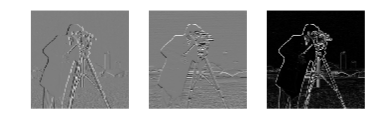

In [27]:
def SobelAlo(image,operator):
    if operator == 'h':
        op = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    else:
        op = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    new_image = np.zeros((np.shape(image)[0]-np.shape(op)[0]+1,
                         np.shape(image)[1]-np.shape(op)[1]+1))
    for i in range(np.shape(new_image)[0]):
        for j in range(np.shape(new_image)[1]):
            new_image[i,j] = np.sum(image[i:i+np.shape(op)[0],j:j+np.shape(op)[1]]*op)
    return new_image
vIm = SobelAlo(Im,'v')
hIm = SobelAlo(Im,'h')
gradIm = np.sqrt(vIm**2+hIm**2)
plt.subplot(131)
plt.imshow(vIm,cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(hIm,cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(gradIm,cmap='gray')
plt.axis('off')
plt.show()

### 二阶导数算子
1. 拉普拉斯算子
\begin{bmatrix} -1 &-1 &-1\\-1& 8 &-1 \\-1 &-1 &-1\end{bmatrix}
2. Canny 算子


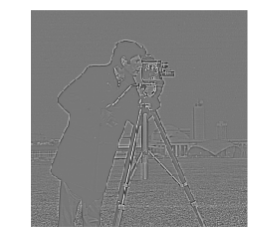

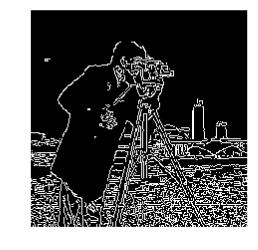

In [33]:
def LaprasAlo(image):
    op = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    new_image = np.zeros((np.shape(image)[0]-np.shape(op)[0]+1,
                         np.shape(image)[1]-np.shape(op)[1]+1))
    for i in range(np.shape(new_image)[0]):
        for j in range(np.shape(new_image)[1]):
            new_image[i,j] = np.sum(image[i:i+np.shape(op)[0],j:j+np.shape(op)[1]]*op)
    return new_image
lapIm = LaprasAlo(Im)
plt.imshow(lapIm,cmap='gray')
plt.axis('off')
plt.show()
cannyIm = cv2.Canny(Im,20,100)
plt.imshow(cannyIm,cmap='gray')
plt.axis('off')
plt.show()